# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)
data.head()

,0,1
0,0,0.019404
1,1,0.043634
2,2,0.023797
3,3,0.444340
4,4,0.578160


# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

In [8]:
def pdf(lambd, x):
    return lambd*np.exp(-1*lambd*x)

L1=1
L2=1
for i in data[1].values:
    L1=L1*pdf(lambd=1, x=i)
    L2=L2*pdf(lambd=2, x=i)
log_L1=np.log(L1)
log_L2=np.log(L2)
log_diff=log_L1-log_L2
print("Log Likelihood Difference =",log_diff)

Log Likelihood Difference = -20.366416970604874


### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [11]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)
sample1.head()

,0,1
0,0,-0.179278
1,1,0.236714
2,2,0.255502
3,3,-0.029321
4,4,0.004818


In [12]:
sample2.head()

,0,1
0,0,0.680541
1,1,0.436810
2,2,0.604089
3,3,0.518702
4,4,0.479711


Find the parameters required to compute the T statistic

In [25]:
sig = 0.05
mean1 = np.mean(sample1[1].values)
mean2 = np.mean(sample2[1].values)
std1 = np.std(sample1[1].values)
std2 = np.std(sample2[1].values)
n1 = sample1[1].shape[0]
n2 = sample2[1].shape[0]

In [34]:
#Find the degrees of freedom to get the critical value
T = (mean1-mean2)/np.sqrt((std1/n1)+(std2/n2))
deg = np.square((std1/n1)+(std2/n2))/(((std1/n1)**2)/(n1-1)+((std2/n2)**2)/(n2-1))

Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' is it is rejected, otherwise print 'NO'.

In [35]:
critical_value = stats.t.pdf((1-sig)/2,deg)
print('T : {}, Critical Value : {}'.format(np.abs(T),critical_value))
if np.abs(T) > critical_value:
#   print('Null hypothesis is rejected')
    print('YES, Null hypothesis is rejected')
else:
#   print('Null hypothesis is not rejected')
    print('NO, Null hypothesis is not rejected')

T : 7.936329632688935, Critical Value : 0.3556616989230089
YES, Null hypothesis is rejected


Plot the distribution of both the samples to visualize

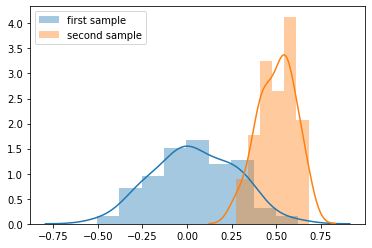

In [36]:
sns.distplot(sample1[1].values)

sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()